# ‼️Language Detection using NLP and Machine Learning‼️

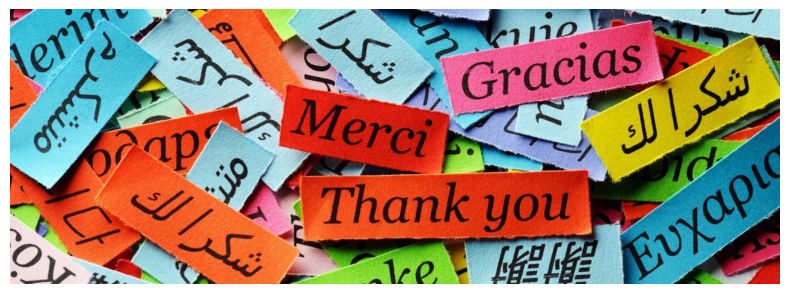

In [59]:
import matplotlib.pyplot as plt
from PIL import Image

fname = "1669374443124.jpeg"
image = Image.open(fname)

plt.figure(figsize=(8,5))    
plt.imshow(image)            
plt.axis("off")              
plt.tight_layout()
plt.show()

In [60]:
import numpy as np
import pandas as pd

In [61]:
data = pd.read_csv("Language.csv")

In [62]:
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


### 👉Checking NULL Values

In [67]:
data.isnull().sum()

Text        0
language    0
dtype: int64

### 👉Count Values

In [68]:
data['language'].value_counts()

language
Estonian      1000
Swedish       1000
Thai          1000
Tamil         1000
Dutch         1000
Japanese      1000
Turkish       1000
Latin         1000
Urdu          1000
Indonesian    1000
Portugese     1000
French        1000
Chinese       1000
Korean        1000
Hindi         1000
Spanish       1000
Pushto        1000
Persian       1000
Romanian      1000
Russian       1000
English       1000
Arabic        1000
Name: count, dtype: int64

### 👉Check Datatypes

In [69]:
data.dtypes

Text        object
language    object
dtype: object

### 👉Convert Text and Language Section into Array

In [70]:
x = np.array(data['Text'])
y = np.array(data['language'])

In [71]:
print(x)

['klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'
 'sebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris '
 'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม'
 ...
 'con motivo de la celebración del septuagésimoquinto ° aniversario de la fundación del departamento en  guillermo ceballos espinosa presentó a la gobernación de caldas por encargo de su titular dilia estrada de gómez el h

In [72]:
print(y)

['Estonian' 'Swedish' 'Thai' ... 'Spanish' 'Chinese' 'Romanian']


In [73]:
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [74]:
cv = CountVectorizer()
X = cv.fit_transform(x)

### 👉Splitting the data into Training Data and Test Data

In [75]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.33 ,random_state = 42)

In [76]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 613529 stored elements and shape (14740, 277720)>

In [77]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 613529 stored elements and shape (14740, 277720)>
  Coords	Values
  (0, 197295)	2
  (0, 197708)	1
  (0, 197801)	1
  (0, 198388)	1
  (0, 197467)	1
  (0, 197865)	2
  (0, 197604)	1
  (0, 198428)	1
  (0, 198501)	1
  (0, 198556)	1
  (0, 197332)	1
  (0, 197485)	2
  (0, 198123)	1
  (0, 197892)	1
  (0, 197990)	1
  (0, 198053)	1
  (0, 198417)	1
  (0, 197623)	1
  (1, 197641)	2
  (1, 197314)	1
  (1, 197931)	1
  (1, 197804)	3
  (1, 198397)	1
  (1, 197149)	1
  (1, 197781)	1
  :	:
  (14738, 188817)	1
  (14738, 192004)	1
  (14738, 157171)	1
  (14738, 190346)	1
  (14738, 190725)	1
  (14738, 189685)	1
  (14738, 159269)	2
  (14738, 145431)	1
  (14738, 173292)	1
  (14738, 176062)	1
  (14738, 159959)	1
  (14738, 190198)	1
  (14738, 167124)	1
  (14738, 168158)	1
  (14738, 180260)	2
  (14738, 153262)	1
  (14738, 162150)	1
  (14738, 153355)	1
  (14738, 178104)	1
  (14738, 163770)	1
  (14739, 223002)	1
  (14739, 235170)	1
  (14739, 222446)	1
  (14739

In [78]:
y_test

array(['Japanese', 'Russian', 'Latin', ..., 'Turkish', 'Arabic',
       'English'], shape=(7260,), dtype=object)

### 👉Model Training

In [79]:
model = MultinomialNB()

In [80]:
model.fit(X_train , y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


### 👉Accuracy on the Training data

In [81]:
model.score(X_train , y_train)

0.9841248303934871

### 👉Accuracy on the Testing data

In [103]:
model.score(X_test , y_test)

0.953168044077135

### 👉Output

In [102]:
user = input("Enter a Text 👉")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text 👉 Je m'appelle Shivam Singh


['French']
